## Cluster Analysis in Python

### CHAPTER 1. Introduction to Clustering

#### 1.1 Unsupervised learning: basics

Everyday example: Google News
* How does Google News classify articles?
* Technique: unsupervised learning algorithm: clustering!
* How: match frequent terms in articles to find similarity

What is unsupervised learning?
* A group of machine learning algorithms that find patterns in data
* Data for algorithms has **NOT** been **labeled, classified or characterized**
* The objective of the algorithm is to interpret any structure in the data
* Common unsupervised learning algorithms:
    * Clustering
    * Neural networks
    * Anomaly detection

What is clustering?
* The process of grouping items with similar characteristics
* Items in groups similar to each other than in other groups


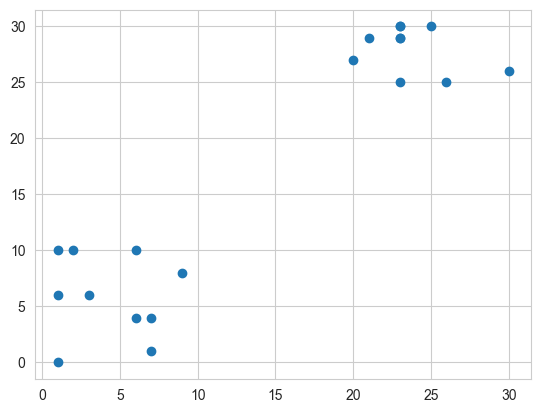

In [3]:
# pokemon sightings
from matplotlib import pyplot as plt
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]
plt.scatter(x, y)
plt.show()
# from the plot, we can tell there are 2 clusters.

#### 1.2 Basics of cluster analysis

What is a cluster?
* A group of items with similar characteristics
* Examples:
    * Google News: articles where similar words and word associations appear together
    * Customer Segments

Clustering algorithms:
* Hierarchical clustering (studied in this course)
* K means clustering (studied in this course)
* DBSCAN
* Gaussian Methods

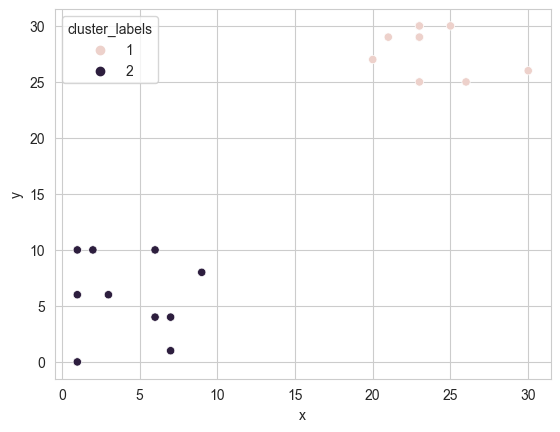

In [4]:
# hierarchical clustering in SciPy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# create a dataframe 'df'
df = pd.DataFrame({'x': x,
                  'y': y
})

# compute distance
Z = linkage(df, 'ward')

# generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

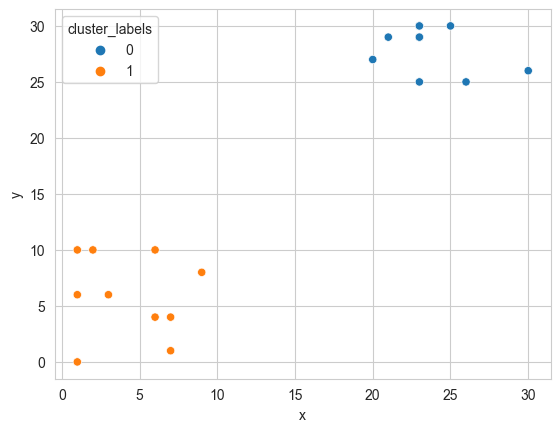

In [5]:
# K-means clustering in SciPy
from scipy.cluster.vq import kmeans, vq

# change data types
df = pd.DataFrame({'x': x,
                   'y': y
                   })
df['x'] = df['x'].astype('float')
df['y'] = df['y'].astype('float')

# # compute cluster centers
centroids,_ = kmeans(df, 2)
#
# # assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

#### 1.3 Data preparation for cluster analysis

Why prepare data for clustering?
* Variables have incomparable units
* Variables have different scales and variances
* Data in raw form may lead to bias in clustering
* Clusters may be heavily dependent on one variable
* Solution: **normalization** of individual variables!

What is normalization?
* Process of rescaling data to a standard deviation of 1
$$x_new = x / std_dev(x) $$

In [6]:
# normalize basic list data
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt

# initial data
goals_for  = [4,3,2,3,1,1,2,0,1,4]

# normalize data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


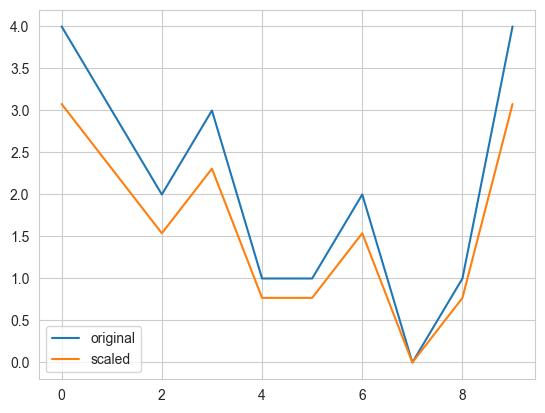

In [7]:
# visualize original and scaled data
plt.plot(goals_for, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()

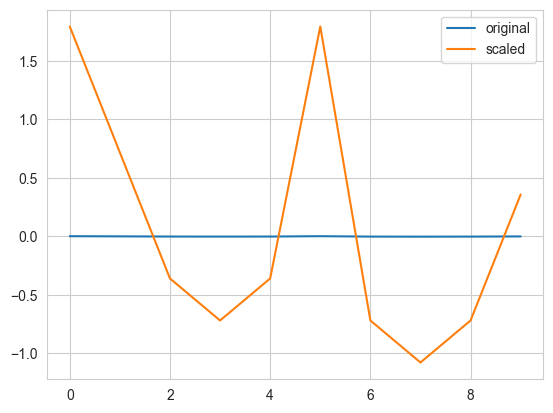

In [8]:
# normalization of small numbers

# prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# normalize data
scaled_data = whiten(rate_cuts)

# visualize data
plt.plot(rate_cuts, label='original')
plt.plot(scaled_data, label='scaled')
plt.legend()
plt.show()


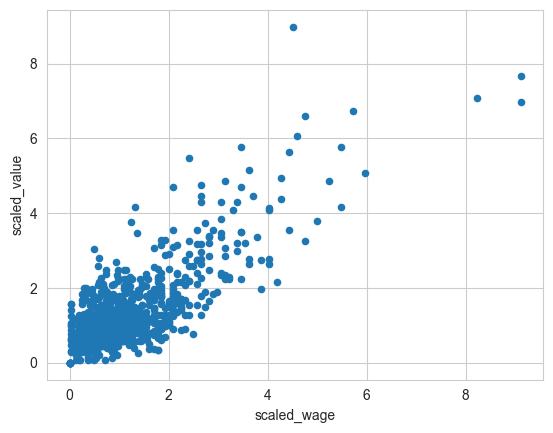

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [9]:
# FIFA 18: normalize data
import pandas as pd
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt

# get dataset
fifa = pd.read_csv('6_datasets/fifa_18_sample_data.csv')

# get two columns and scale them
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# plot two columns
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()

# check mean and std_dev
print(fifa[['scaled_wage', 'scaled_value']].describe())

### CHAPTER 2. K-Means Clustering

#### 2.1 Basics of k-means clustering

* Creating a distance matrix using *linkage* method:
    * parameter 1: observations
    * parameter 2: method -> how to calculate the proximity of clusters
    * parameter 3: metric -> distance metric
    * parameter 4: optimal_ordering -> order data points

* What *method* should use?
    * 'single': based on two closest objects
    * 'complete': based on two farthest objects
    * 'average': based on the arithmetic mean of all objects
    * 'centroid': based on the geometric mean of all objects
    * 'median': based on the median of all objects
    * 'ward': based on the sum of squares

* Creating cluster labels with *fcluster* method:
    * parameter 1: distance_matrix -> output of* linkage()* method
    * parameter 2: num_clusters -> number of clusters
    * parameter 3: criterion -> how to decide thresholds to form clusters

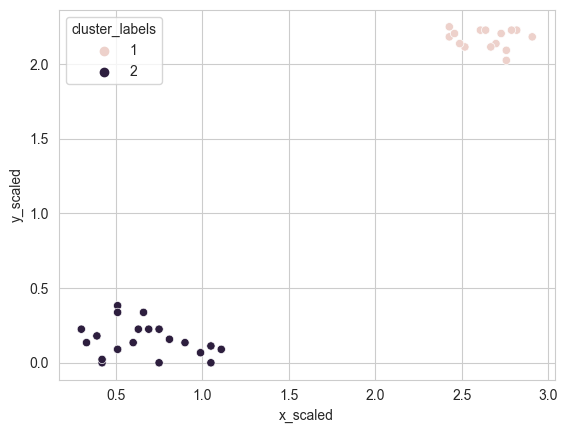

In [10]:
# hierarchical clustering: ward method
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage

# create raw data
x_coordinate = [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17]

y_coordinate = [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15]

# normalize data and create dataframe
x_scaled = whiten(x_coordinate)
y_scaled = whiten(y_coordinate)
comic_con = pd.DataFrame({
    'x_coordinate': x_coordinate,
    'y_coordinate': y_coordinate,
    'x_scaled': x_scaled,
    'y_scaled': y_scaled
})

# use linkage method
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

# assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)
plt.show()

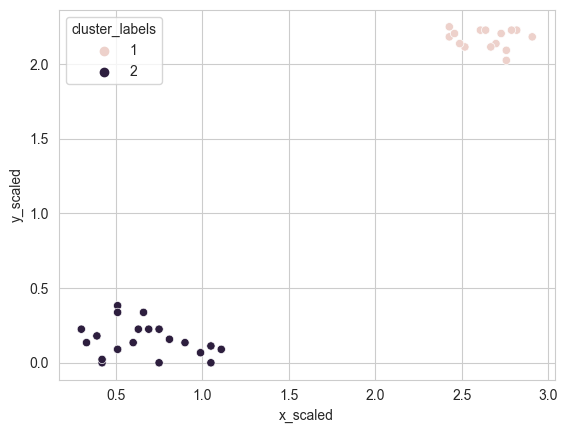

In [11]:
# hierarchical clustering: single method
# use the linkage() method
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='single', metric='euclidean')

# assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)
plt.show()

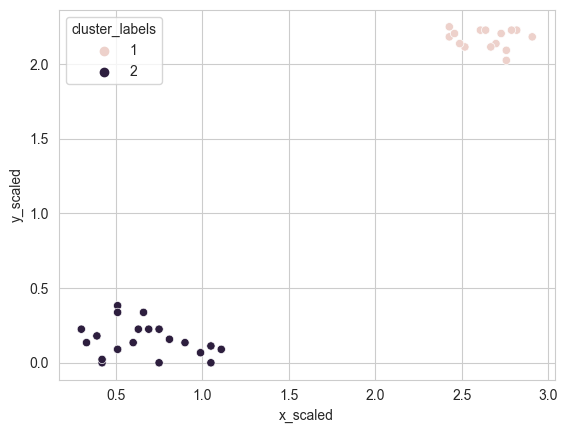

In [12]:
# hierarchical clustering: complete method
# use the linkage() method
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='complete', metric='euclidean')

# assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con)
plt.show()

#### 2.2 Visualize clusters

Why visualize clusters?
* Make sense of the clusters formed
* Additional step in validation of clusters
* Spot trends in data

Visualizing options:
* *seaborn* library
* *matplotlib* library

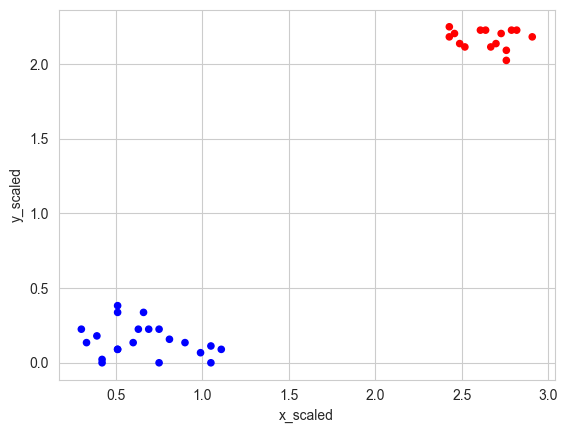

In [13]:
# visualize clusters with matplotlib
# use dataframe comic_con created in previous exercise
from matplotlib import pyplot as plt

# define a color dictionary for clusters
colors = {1: 'red', 2: 'blue'}

# plot a scatter plot
comic_con.plot.scatter(x='x_scaled',
                       y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda x:colors[x]))
plt.show()

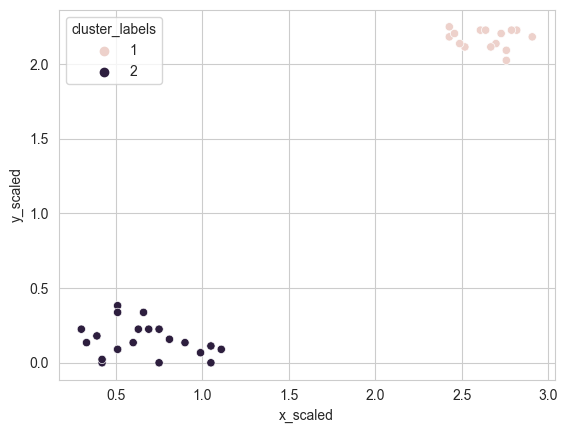

In [14]:
# visualize clusters with seaborn
import seaborn as sns

# plot a scatter plot
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data=comic_con)
plt.show()

#### 2.3 How many clusters?

* We can use **dendrograms** to help in showing progressions as clusters are merged
* Drawing a horizontal line in dendrograms can tell you the number of clusters at that stage
* There is no right choice for clusters number picking!

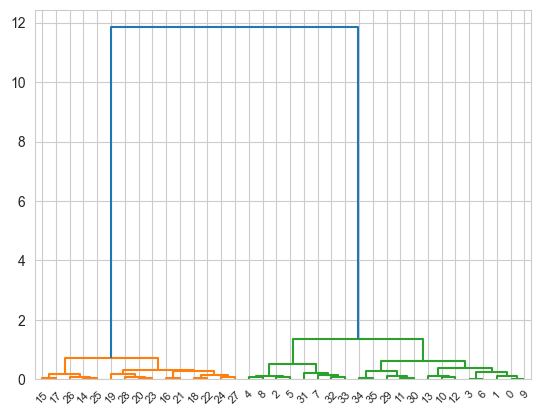

In [15]:
# dendrogram in SciPy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# create a distance matrix
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method='ward',
                          metric='euclidean')

# create a dendrogram
dn = dendrogram(distance_matrix)
plt.show()

#### 2.4 Limitations of k-means clustering

* *timeit* module can be used to measure the time it takes for specific task
* We use it to measure the *linkage()* method:
    * Increasing runtime with increasing data points
    * Quadratic increase of runtime
    * Not feasible for large datasets



In [16]:
# timing run of hierarchical clustering
# still use dataset 'comic_con' created earlier
import timeit
from scipy.cluster.hierarchy import linkage

%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

477 µs ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
# FIFA 18: exploring defenders
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten

# get dataset
fifa = pd.read_csv('6_datasets/fifa_18_dataset.csv')

# normalize data
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# compute distance matrix
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# assign cluster labels
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# display cluster centers
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby(by=['cluster_labels']).mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


### CHAPTER 3. K-Means Clustering

#### 3.1 Basics of k-means clustering

* Recall: Hierarchical clustering has a critical drawback: *runtime*
* K-means runs significantly faster on large datasets
* Step 1: k-means method
    * method parameters:
        1) obs: standardized observations
        2) k_or_guess: number of clusters
        3) iter: number of iterations (default: 20)
        4) thres: threshold (default: 0.00001)
        5) check_finite: whether to check if observations contain only finite numbers (default: True)
    * Returns two objects: cluster centers, distortion
* Step 2: generate cluster labels with *vq* method
    * vq method parameters:
      1) obs: standardized observations
      2) code_book: cluster centers
      3) check_finite: whether to check if observations contain only finite numbers (default: True)
    * Returns two objects: a list of cluster labels, a list of distortions


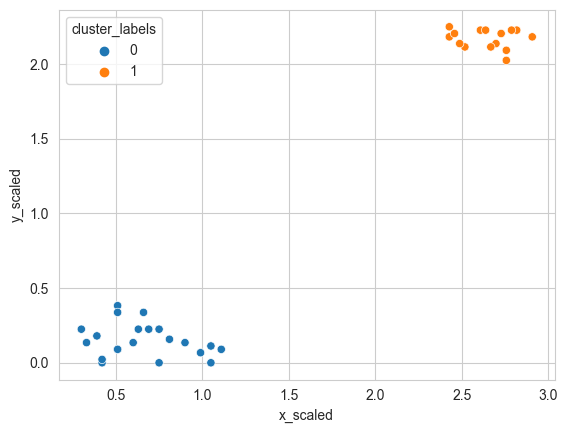

In [18]:
# k-means in SciPy
# use 'comic_con' dataset
from scipy.cluster.vq import kmeans, vq
import seaborn as sns
import matplotlib.pyplot as plt

# generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# plot clusters
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data=comic_con)
plt.show()

In [19]:
# runtime of k-means clustering
# use 'fifa'dataframe
import pandas as pd
from scipy.cluster.vq import kmeans, whiten
import timeit

# get dataset
fifa = pd.read_csv('6_datasets/fifa_18_dataset.csv')
print(fifa.columns)

# normalize data
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

# measure processing time
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 3)

Index(['sliding_tackle', 'aggression'], dtype='object')
184 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 3.2 How many clusters?

* No *absolute* method to find the right number of clusters (k) in k-means clustering
* Recall:
    * Distortion is sum of squared distances of points from cluster centers
    * It decreases with an increasing number of clusters
    * Distortion becomes zero when the number of clusters equals the number of points
* One method: Elbow method -> line plot between cluster centers and distortion
* Other methods: average silhouette and gap statistic (not covered in this course)

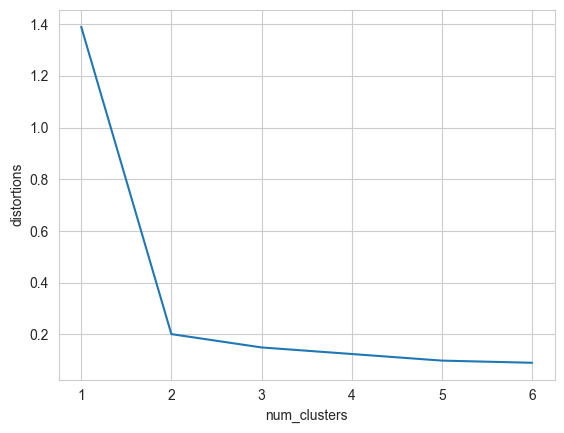

In [21]:
# elbow method on distinct clusters
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

distortions = []
num_clusters = range(1, 7)

# create a list of distortions from kmeans
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# create dataframe for elbow plot
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# create plot
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()


#### 3.3 Limitation of k-means clustering

* How to find the right k (number of clusters)?
* Impact of seeds
* Biased towards equal sized clusters

You should consider you data size and patterns before deciding on algorithm

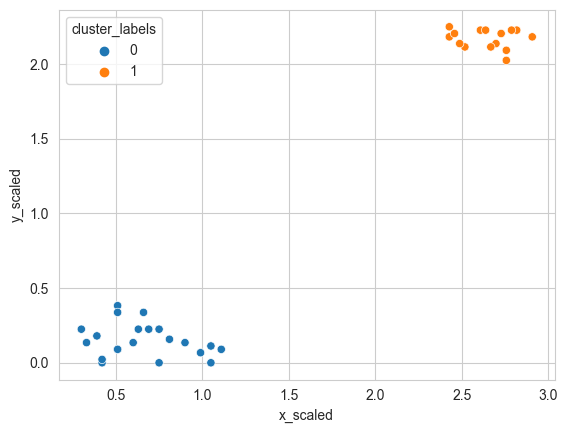

In [22]:
# impact of seeds on distinct clusters
from numpy import random
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns
random.seed(0)

# generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data=comic_con)
plt.show()

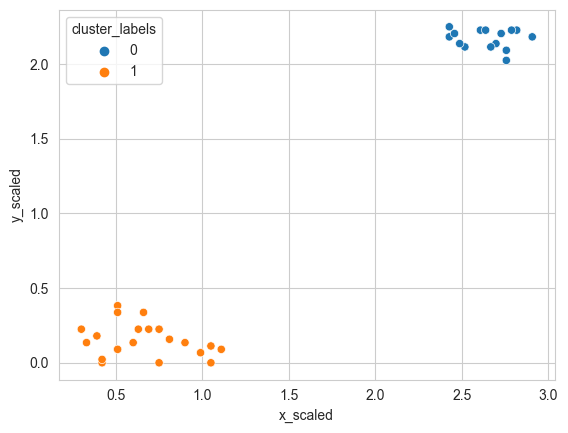

In [23]:
random.seed([1, 2, 1000])

# generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data=comic_con)
plt.show()

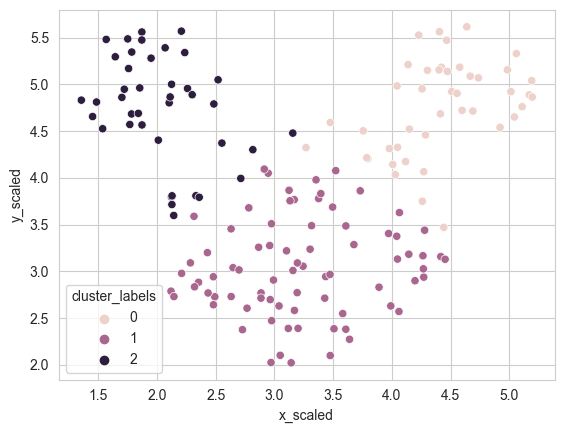

In [24]:
# uniform clusters
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# create dataframe
x_scaled = [2.209458273773183,
            2.492083197308515,
            2.331102782411336,
            2.122805513582657,
            4.047934869250256,
            3.5070116963226825,
            2.119113039026133,
            3.608466995581365,
            4.441841447184339,
            3.4752768469967337,
            4.416762499882229,
            2.1422771038243305,
            4.0295216950623685,
            4.048542844092579,
            2.429049402158786,
            3.156315829947019,
            2.314744930569359,
            4.279175928741777,
            2.480351958716797,
            4.271683739748797,
            2.7135132193616447,
            3.157697767738165,
            2.7275977999727097,
            3.3765333195759184,
            2.9467648623639557,
            2.479915098255142,
            3.6767325044132884,
            3.3950123287783662,
            2.8857023093385195,
            2.6306206928997806,
            3.4957210749829546,
            2.991944880847269,
            3.5220343312346123,
            3.43650606366341,
            3.4733922738859793,
            4.144398179765656,
            4.2648465112275575,
            3.243735547657223,
            3.1685782791593025,
            3.1326536220919694,
            2.9133169254380697,
            4.259662121165602,
            2.647124430929681,
            2.865587675659299,
            2.1441194394725502,
            2.8160867118770967,
            4.007771270989095,
            3.1243129075451397,
            3.102830080301418,
            3.3036816054643374,
            2.964151343645998,
            3.142278236730881,
            3.2688991635190483,
            2.434822622318459,
            3.475468269537367,
            2.1266571832693435,
            3.0390882236306607,
            3.5816558723310497,
            3.990828088836716,
            4.060528889502533,
            3.1181152431835533,
            4.268355851119736,
            2.359401472124877,
            3.972292829266566,
            2.885335789784109,
            2.6312409610545524,
            3.7306881232334987,
            2.35376610097547,
            2.3197573201399795,
            2.766732280057529,
            3.890718180639579,
            2.1278711020077736,
            3.639576215068729,
            4.272043226746745,
            2.970685930679696,
            3.978943657432247,
            3.7959297940117143,
            4.116821403215049,
            3.607937475363483,
            2.9747794807825123,
            2.97621074954571,
            3.0490496191651455,
            4.453645642212576,
            4.041673536146248,
            3.1933786705895084,
            2.959718986106372,
            3.316005603456562,
            3.428501153621675,
            2.552491507140301,
            3.195382155487077,
            3.786317090627584,
            2.6983490071789,
            4.197181349871027,
            2.2842519073968446,
            3.170382932080907,
            2.7816661948534893,
            3.7558542990513564,
            3.201206978065492,
            3.3541886062204456,
            4.064395247213645,
            1.7506302297857137,
            1.7578822525836146,
            2.1237953606968447,
            1.768115990895558,
            1.3553130117728844,
            2.259882987037385,
            1.7828478088397774,
            2.519903360035818,
            1.7846783845194223,
            1.4513211556427255,
            1.5367687704980166,
            1.8708130538998697,
            2.207191657230334,
            1.8407947748070448,
            2.4840667545124724,
            1.949225637799134,
            1.8528834818931987,
            2.0689199366900537,
            1.6443161453661694,
            1.8703882712496254,
            2.1033467556884275,
            1.7210695621007455,
            1.8718310503202171,
            1.7007180973222211,
            2.236302810319418,
            1.5670977924072511,
            2.0109427556908606,
            2.111636242399098,
            1.4846224617601045,
            2.2991850465715338,
            4.577495144399997,
            5.1910786295411,
            4.286912615194338,
            4.466682039205901,
            4.9839113015620775,
            5.170132992071414,
            4.229168069776129,
            4.638501317419365,
            5.109570897869206,
            4.149377085184654,
            4.405130211606849,
            4.510216921009268,
            4.4215957573769735,
            5.0137715995935395,
            4.044101445858834,
            4.401971886716514,
            4.690010282759192,
            4.257470756586666,
            5.060333590531702,
            5.195695060805812,
            5.0433326073161195,
            4.472917525661631,
            4.30317467997159,
            4.667069869040544,
            4.554949276590388,
            4.597840148434634,
            4.7369678119925185,
            4.413610402499769,
            4.13810193280437,
            4.921574655602989]
y_scaled = [2.977523635649635,
            2.7270106112632395,
            3.808207661579468,
            3.794947887400684,
            3.1303031656759415,
            2.384487657695536,
            2.7870690109995637,
            3.485229418342975,
            3.46956378039965,
            2.0982538192934608,
            3.157383605667519,
            3.5970945423786214,
            4.034173257317054,
            4.3267030427253745,
            3.19932236975803,
            4.478517867838779,
            3.5882835431243194,
            3.4390033210643716,
            2.6415750124160793,
            2.9370955435797366,
            3.9936159897802996,
            3.0081466754800332,
            2.3751161448890996,
            3.7778255676212615,
            4.049543865162858,
            2.9411878311975763,
            3.2852874982638114,
            3.8312893120181397,
            2.7685580977672894,
            3.4539977654033396,
            3.686768306781816,
            2.9060841475062866,
            4.076748150024944,
            2.943311677873316,
            2.9662040834791013,
            3.18238828747986,
            3.16611538151428,
            3.0542212157868227,
            3.7663622332153466,
            3.7542062433224617,
            4.093271803283573,
            3.7491664339861606,
            3.0385253707001767,
            3.257037206370941,
            2.7289160658595075,
            4.300861165353343,
            4.143245691876617,
            3.8666472301755963,
            3.218929880983462,
            3.236271601112376,
            2.6966264143985814,
            2.020674406221792,
            4.323052104441459,
            2.7677124828726707,
            4.59250626752419,
            3.7142304050668624,
            2.6289206063046766,
            2.547156428395187,
            2.6290380754399667,
            2.569373979320631,
            2.3883351413622527,
            3.026196996947035,
            3.7917725571630583,
            3.403848088615418,
            2.7125836421437954,
            2.7295654171953476,
            3.8610662269321137,
            2.882272983405791,
            2.8335552697644855,
            2.604636992709637,
            2.829507947605553,
            3.8074874905608005,
            2.271969173256302,
            4.065320745981978,
            2.0238141689243907,
            4.313578035588811,
            4.203556789982465,
            4.173535027768631,
            2.3797278827934996,
            3.508326079408185,
            2.471177574508659,
            2.100508389040668,
            3.1282213033079587,
            3.3747381378726127,
            2.771011923522023,
            3.275462206410293,
            3.4879046972982084,
            2.7120227778181594,
            4.371547025352263,
            3.089165429555756,
            4.21528459563295,
            3.0144464561692135,
            2.8987200746874495,
            3.0900146561379285,
            2.581115616432954,
            3.678851393992724,
            4.503061584529547,
            2.389240763110423,
            3.978485606074158,
            3.6279709553737596,
            5.486580759579503,
            5.169608297723848,
            5.000883765945959,
            4.570826397261044,
            4.831242612828434,
            4.955582102762716,
            4.683486733740162,
            5.049054511041198,
            5.3459229162358985,
            4.655762713696998,
            4.5253936351242094,
            5.560348319952622,
            5.569496000054267,
            4.689870660312107,
            4.790221150450904,
            5.280550126447974,
            4.962196712671917,
            5.391201550094247,
            5.295295439650914,
            5.4747408133289195,
            4.80268440340641,
            4.948053391763031,
            4.565936559780044,
            4.8608642346939614,
            5.340165764809406,
            5.481015427339746,
            4.4031060024247255,
            4.865374734053805,
            4.811003685934786,
            4.889399600966496,
            5.184015853607775,
            5.040213812020108,
            4.459470956493112,
            5.4721546898324664,
            5.1550916518713334,
            4.886810677970284,
            5.527443762957301,
            5.616271630194606,
            4.760830122825453,
            4.521054632139177,
            5.563230950663291,
            4.922831617027641,
            5.183420137037504,
            4.922061807828832,
            4.983013438514414,
            5.154696491281144,
            4.7144995014329805,
            4.951999120426024,
            5.329526968861268,
            4.864233711229035,
            4.651065854960336,
            5.138007378400804,
            5.1502342230207345,
            5.087701121724132,
            4.904252475775168,
            4.722198479999858,
            5.069442095913127,
            4.684411279830609,
            5.2113927616554925,
            4.539826049283649]
mouse = pd.DataFrame({'x_scaled': x_scaled, 'y_scaled': y_scaled})

# generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = mouse)
plt.show()

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


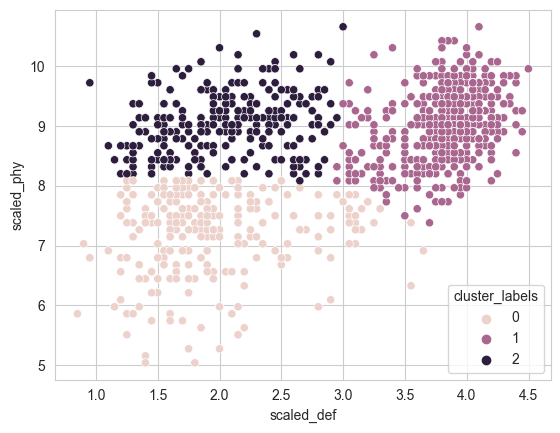

In [26]:
# FIFA 18: defenders revisited
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq
from numpy import random

# get data
fifa = pd.read_csv('6_datasets/fifa_18_sample_data.csv')
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

# random seed
random.seed([1000, 2000])

# generate cluster centers
cluster_centers, _ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# create scatter plot
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

### CHAPTER 4. Clustering in Real World

#### 4.1 Dominant color in images

*

#### 4.2 Document clustering

#### 4.3 Clustering with multiple features